In [6]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from collections import Counter
from nltk.util import ngrams
import matplotlib.pyplot as plt

In [7]:
#Open file 
with open('hamilton_lyrics.txt', 'r') as file:
    lyrics = file.read()

#Remove anything that is not a word from text and make everything lower case
cleaned_words = re.sub(r'\W+', ' ', lyrics).lower()

In [8]:
#Tokenize words
word_tokens= word_tokenize(cleaned_words)

#Remove most common stop words
stop_words = stopwords.words('english')

filtered_words = []
for word in word_tokens:
    if word not in stop_words:
        filtered_words.append(word)

In [9]:
#Part of speech tagging
def get_part_of_speech(word):
    probable_part_of_speech = wordnet.synsets(word)
    pos_counts = Counter()
    pos_counts["n"] = len([ item for item in probable_part_of_speech if item.pos()=="n"])
    pos_counts["v"] = len([ item for item in probable_part_of_speech if item.pos()=="v"])
    pos_counts["a"] = len([ item for item in probable_part_of_speech if item.pos()=="a"])
    pos_counts["r"] = len([ item for item in probable_part_of_speech if item.pos()=="r"])
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    return most_likely_part_of_speech

#Lemmatization of words
normalizer = WordNetLemmatizer()
normalized = [normalizer.lemmatize(token, get_part_of_speech(token)) for token in filtered_words]

In [10]:
#Create bag of words dictionary 
def text_to_bow(text):
    bow_dictionary = {}
    tokens = text
    for token in tokens:
        if token in bow_dictionary:
            bow_dictionary[token] += 1
        else:
            bow_dictionary[token] = 1
    return bow_dictionary

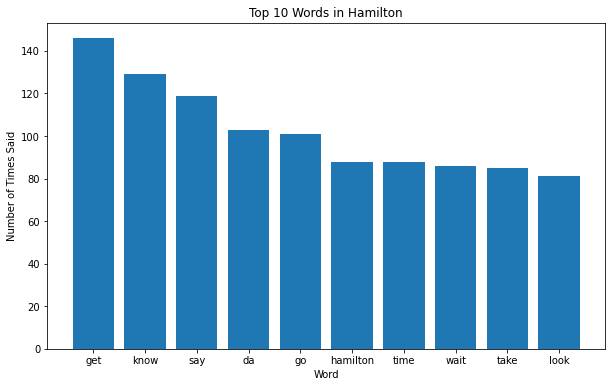

In [11]:
#Sort BOW by dictionary value
sorted_words = sorted(text_to_bow(normalized).items(), key=lambda x: x[1], reverse=True)

#Top 10 most common words used in Hamilton
top10 = sorted_words[:10]

#Plot top 10 words
x = range(len(top10))
y = [146, 129, 119, 103, 101, 88, 88, 86, 85, 81]

plt.figure(figsize = (10, 6))

ax = plt.subplot()
plt.bar(x, y)
ax.set_xticks(range(len(top10)))
ax.set_xticklabels(['get', 'know', 'say', 'da', 'go', 'hamilton', 'time',    'wait', 'take', 'look'])
plt.title('Top 10 Words in Hamilton')
plt.xlabel('Word')
plt.ylabel('Number of Times Said')
plt.show()

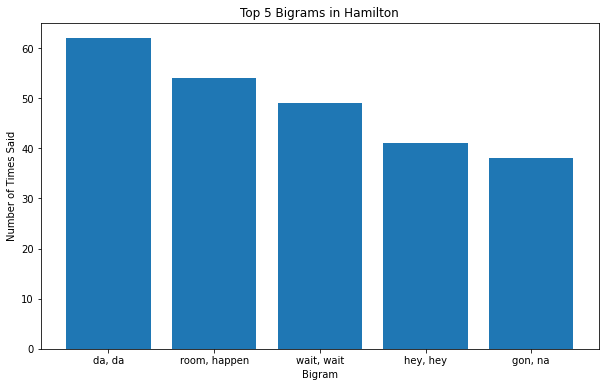

In [12]:
#5 most common bigrams
bigrams_prepped = ngrams(normalized, 2)
bigrams = Counter(bigrams_prepped)
most_common_bigrams = bigrams.most_common(5)

#Plot top 5 bigrams
x_ngram = range(len(most_common_bigrams))
y_ngram = [62, 54, 49, 41, 38]

plt.figure(figsize = (10, 6))

ax2 = plt.subplot()
plt.bar(x_ngram, y_ngram)
ax2.set_xticks(range(len(most_common_bigrams)))
ax2.set_xticklabels(['da, da', 'room, happen', 'wait, wait', 'hey, hey', 'gon, na'])
plt.title('Top 5 Bigrams in Hamilton')
plt.xlabel('Bigram')
plt.ylabel('Number of Times Said')
plt.show()